In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [ ]:
parent_directory = os.path.dirname(os.getcwd())
file_name = 'public_data.npz'
file_path = os.path.join(parent_directory, file_name)
file_path

'/Users/pippolazza/Desktop/AN2DL/Challenge1-AN2DL-TOTTI_ROBOT-1/public_data.npz'

In [ ]:
with np.load(file_path, allow_pickle=True) as public_data:
    images = public_data['data']
    labels = public_data['labels']

In [ ]:
def convert_image(data):
    images = []
    for img in data:
        img = (img / 255).astype(np.float32)
        if img is not None:
            images.append(img)

    return np.array(images)

In [ ]:
normalized_images = convert_image(images)

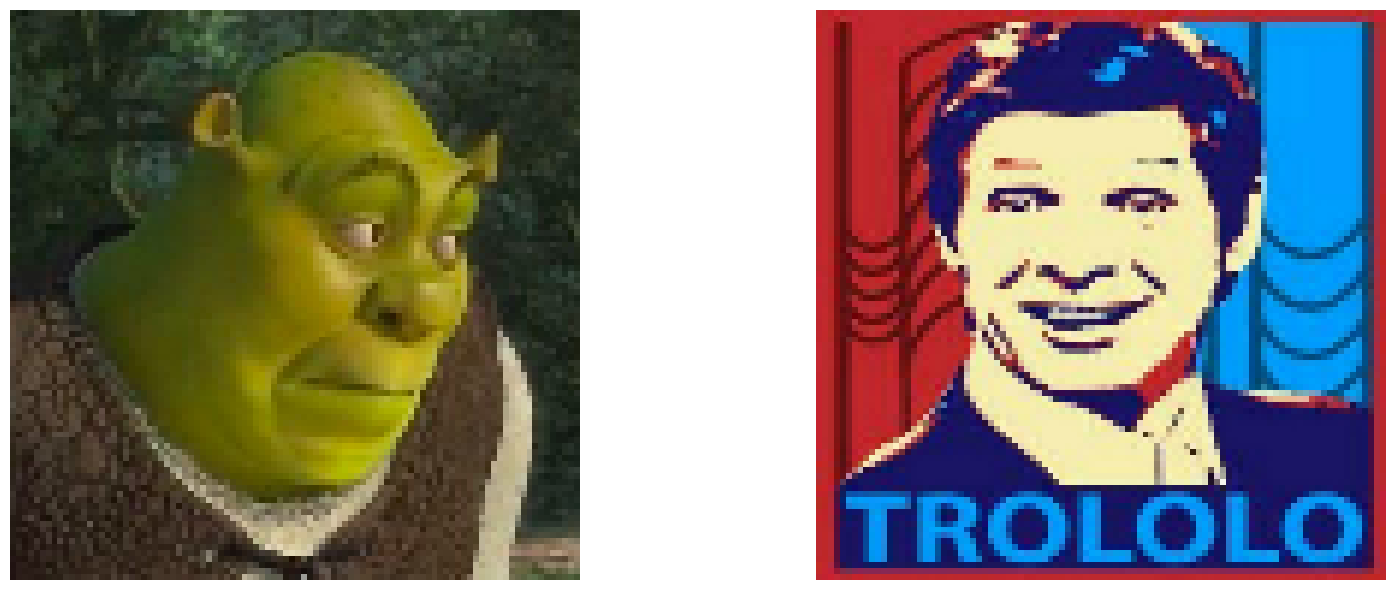

In [ ]:
# outlier images found by inspecting the dataset
fig, axs = plt.subplots(1,2, figsize = (18,6))
axs[0].imshow(normalized_images[58])
axs[0].axis('off')
axs[1].imshow(normalized_images[338])
axs[1].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
shreck_array = images[58]
trololo_array = images[338]
idxs_shreck = []
screck_flat = shreck_array.flatten()
for i in range(images.shape[0]):
    current_image = images[i].flatten()
    if all(current_image == screck_flat):
        idxs_shreck.append(i)

idxs_trololo = []
trololo_flat = trololo_array.flatten()
for i in range(images.shape[0]):
    current_image = images[i].flatten()
    if all(current_image == trololo_flat):
        idxs_trololo.append(i)

In [ ]:
len(idxs_shreck), len(idxs_trololo), idxs_shreck[0],idxs_trololo[0]

(98, 98, 58, 338)

In [ ]:
# remove shreck images
mask_shreck = np.ones(images.shape[0], dtype=bool)
mask_shreck[idxs_shreck] = False

# remove trololo images
mask_trololo = np.ones(images.shape[0], dtype=bool)
mask_trololo[idxs_trololo] = False

#combine masks
combined_masks = np.logical_and(mask_shreck,mask_trololo)

new_images = images[combined_masks]
new_labels = labels[combined_masks]
new_images.shape, new_labels.shape

((5004, 96, 96, 3), (5004,))

In [ ]:
file_name = 'cleaned_dataset.npz'
file_path = os.path.join(parent_directory, file_name)
np.savez(file_path,data=new_images,labels=new_labels)